# Síelő a domboldalon

## Analitikus számolás Lagrange formalizmussal és kényszer erőkkel

Elősször hívjuk be a `sympy` modult és definiáljunk néhány hasznos változót

In [1]:
import sympy as sy # Így töltjük be a sympy-t

In [2]:
sy.init_printing() # ettől csak az egyenletek megjelenítése lesz szép

In [3]:
# szimbolumok deklarálása
l,t,m,g=sy.symbols('lambda,t,m,g') # ezek csak paraméterek illetve t egy skalár változó
# az alábbi szimbólumok lesznek a meghatározandó függgvények
x=sy.Function('x')(t) # x(t) függvény
y=sy.Function('y')(t) # y(t) függvény

A Lagrange függvény a megszokott módon, a kinetikus és a potenciális energia összegéből áll, a kényszert egy Lagrange multiplikátorral vesszük figyelembe. $$L=T-U+\lambda (y-f(x)) $$ Az egyszerűség kedvéért a feladatban vizsgálandó $$f(x)=\cos(x)-x/2$$ egyenlet által megadott domboldal függvénnyel számolunk. A Lagrange függvény a releváns változókkal tehát a


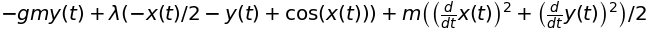

In [4]:
L=m/2*((x.diff(t))**2+(y.diff(t))**2)-m*g*y+l*(sy.cos(x)-x/2-y)                   
L

alakot ölti.

Az Euler-Lagrange egyenletek $$ \partial_{q_i}L-\frac{\mathrm{d}}{\mathrm{d}t}\partial_{\dot{q}_i}L=0 $$ segítségével származtatjuk a megoldandó differenciál egyenleteket.

Az $x$ koordinta szerint variálva a hatást kapjuk, hogy a

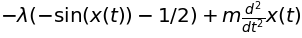

In [5]:
vx=(L.diff(x.diff(t))).diff(t)-L.diff(x)
vx

kifejezés azonosan nulla.

Az $y$ koordináta szerinti variáció

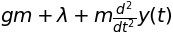

In [6]:
vy=(L.diff(y.diff(t))).diff(t)-L.diff(y)
vy

ebből $\lambda$-t kifejezve kapjuk, hogy a multiplikátor megegezik az alábbi kifejezéssel:

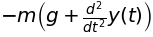

In [7]:
sy.solve(vy,l)[0]

$y(t)$-t kifejezve a kényszerből 

In [8]:
yt=(sy.solve(L.diff(l),y)[0])
yt

és véve a második idő szerinti deriváltat kapjuk, hogy

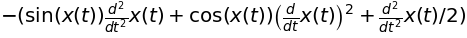

In [9]:
yt2d=(yt).diff(t,t)
yt2d

A fenti kifejezést vissza helyettesítve a $\lambda$ már korábban meghatározott alakjába a multiplikátort kifejezhetjuük az $x(t)$ függvénnyel és annak deriváltjaival a következő alakban:

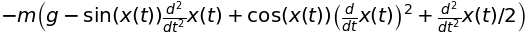

In [10]:
lxd2t=(sy.solve(vy,l)[0]).replace(sy.diff(y,t,t),yt2d)
lxd2t

Ezt a kifejezést vissza írva a hatás $x$ szerinti variálásából kapott egyenletbe és kifejezve belőle $\ddot{x}(t)$-t kapjuk, hogy

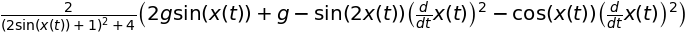

In [11]:
axt=sy.solve(vx.replace(l,lxd2t),x.diff(t,t))[0]
axt

Azt a talán nem túl meglepő eredményt kaptuk hogy a mozgásunk a test tömegétől független másodrendű differenciál egyenlet írja le. 
A fenti kifejezést felhasználva numerikusan meg tudjuk oldani a probléma mozgásegyenletét!

In [12]:
# ez csak néhány segítő szimbólum ami 
# a numerikus és analitikus csomagok közti átemelést segíti
xt,vt=sy.symbols('x_t,v_t') 

In [13]:
# a megoldandó differenciál egyenletet string-é konvertáljuk
eqstr=str(axt.replace(sy.diff(x,t),vt).replace(x,xt))

## Numerikus diferenciálegyenlet megoldás

Az előző fejezetben levezetett differenciálegyenletet a `scipy` csomag `odeint` függvényével oldjuk meg numerikusan.
Ehhez először betöltjuk magát az `odeint`-et és a `pylab` környezet-et is.

In [14]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


A levezetett $x(t)$-ben másodrendű differenciál egyenlet helyett a vele ekvivalens első rendű egyenletrendszert oldatjuk meg $x(t)$-re és $v(t)$-re. A megoldandó rendszer növekvény függvénye triviálisan felírható a fent levezetett kifejezés segítségével:

In [15]:
def f(u, t):
    x_t=u[0] # az u első komponense az x(t)
    v_t=u[1] # az u második komponense v(t)
    g=10 # ez a gravitációs gyorsulás
    # ez maga a növekmény kiértékelése
    # az eval függvénnyel kiértékeljük a szimbolikus számolás végeredményét
    return  [v_t,
             eval(eqstr)]

Oldjuk meg az egyenletet abban az esetben ha kezdetben nyugalomban ált a síelő az $x=0$ pontban:

In [16]:
time=np.linspace(0,10,1000); # az idő intervallum
u0 = [0,0] # kezdeti érték x-re és v-re
u=odeint(f,u0,time) # itt történik a diffegyenlet megoldása

Az alábbiakban egy ábrán ábrázoljuk a kapott $x(t)$, $v_x(t)$ függvényeket és néhány egyéb hasznos mennyiséget:

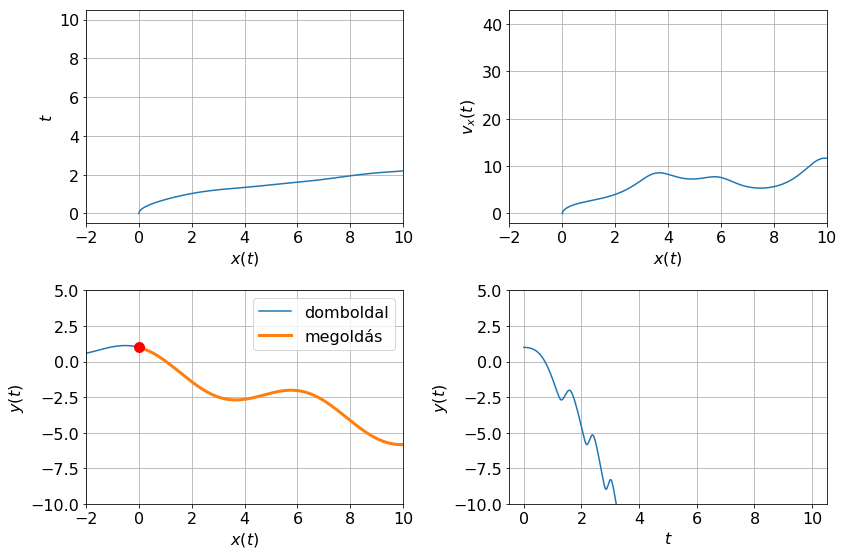

In [17]:
figsize(12,8) # ez a sor az ábra méretét állítja be
rcParams.update({'font.size': 16}) # az ábrafeliratok betű mérete
# az alábbi sorok 2x2-es kép hálót generál

subplot(221)
# ez az ábra az út idő diagramm az x irányban
plot(u[:,0],time)
xlim(-2,10)
xlabel(r'$x(t)$')
ylabel(r'$t$')
grid()

subplot(222)
# ez az ábra a fázistér x,v_x szelete
plot(u[:,0],u[:,1])
xlim(-2,10)
xlabel(r'$x(t)$')
ylabel(r'$v_x(t)$')
grid()

subplot(223)
# ez az ábra a valós térbeli pálya
xx=linspace(-10,10,1000)
yy=cos(xx)-xx/2
plot(xx,yy,label='domboldal')
plot(u[:,0],cos(u[:,0])-u[:,0]/2,lw=3,label='megoldás')
plot(u[0,0],cos(u[0,0])-u[0,0]/2,'ro',ms=10)
grid()
xlabel(r'$x(t)$')
ylabel(r'$y(t)$')
xlim(-2,10)
ylim(-10,5)
legend()

subplot(224)
# ez az ábra az út idő diagramm az y irányban
plot(time,cos(u[:,0])-u[:,0]/2)
grid()
ylabel(r'$y(t)$')
xlabel(r'$t$')
ylim(-10,5)

tight_layout();

A differenciál egyenlet fázisdiagramját a növekvény függvényből származtatott áramlástérképpel is meghatározhatjuk:

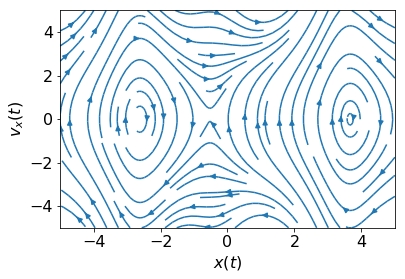

In [18]:
figsize(6,4)
pran=linspace(-5,5,100) # a fázistér mintavételezése 
xp,vp=meshgrid(pran,pran) # az x-v_x síkon
# az áramvonalak megjelenítése
streamplot(xp, vp, vp, eval(eqstr.replace("x_t","xp").replace("v_t","vp").replace("g","10")))
xlabel(r"$x(t)$")
ylabel(r"$v_x(t)$");

## Interaktív kezdeti feltételek

Az alábbiakban az `ipywidgets` modul segítségével készítünk egy kis interaktív ábrát amely a differenciál egyenlet megoldását ábrázolja a felhasználó által beállított kezdőfeltételre.

In [19]:
from ipywidgets import * # interaktivitást 

In [20]:
time=np.linspace(0,10,1000); # az idő intervallum
xx=linspace(-10,10,1000) # a domboldal megrajzolásához  
yy=cos(xx)-xx/2          # tartozó statikus struktúra


@interact(x0=(-10,10,0.025),v0=(-5,5,0.025))
def play(x0=0,v0=0):
    figsize(12,4)
    
    u0 = [x0,v0] # kezdeti érték x-re és v-re
    u=odeint(f,u0,time) # itt történik a diffegyenlet megoldása
    
    subplot(122)
    # ez a fázisdiagram
    plot(u[:,0],u[:,1])
    plot(u[0,0],u[0,1],'ro',ms=10)
    xlabel(r'$x(t)$')
    ylabel(r'$v_x(t)$')
    xlim(-10,10)
    ylim(-10,10)
    
    
    subplot(121)
    # a pálya a valós térben
    plot(xx,yy)
    plot(u[:,0],cos(u[:,0])-u[:,0]/2,label='megoldas',lw=3)
    plot(u[0,0],cos(u[0,0])-u[0,0]/2,'ro',ms=10)
    ylabel(r'$y(t)$')
    xlabel(r'$x(t)$')
    xlim(-10,10)
    ylim(-10,5)
    legend()
    # ez kozmetikai okok miatt kellcsak ide
    tight_layout()

A Jupyter Widget

Jól látható hogy bizonyos kezdeti koordináta értékekre lokális minimumba ragad a megoldás, illetve ha megfelelő kezdeti kinetikus energiát bisztosítunk a rendszer számára akkor ki tudjuk lökni a kezdeti potenciál gátból. 